In [1]:
#importowanie potrzebnych modułów
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Dane testowe

In [2]:
test = pd.read_csv("sign_mnist_test.csv") 
display(test.head())
display(test.info())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


None

### Dane treningowe

In [3]:
#import danych do dataframe'u
train = pd.read_csv("sign_mnist_train.csv") 

display(train.head())
display(train.info())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


None

### Przygotowanie danych

In [4]:
#wyznaczenie x_train
x_train = train.drop(columns=["label"])

#normalizacja na przedział 0-1
x_train = x_train/255.0

#zamiana na float32
x_train = x_train.astype(np.float32)

#stworzenie macierzy tak by zdjęcia były 28x28
x_train = x_train.to_numpy().reshape(-1,28,28)

In [5]:
#to samo ze zmiennymi x_test
x_test = test.drop(columns=["label"])
x_test = x_test/255.0
x_test = x_test.astype(np.float32)
x_test = x_test.to_numpy().reshape(-1,28,28)

In [6]:
#wyznaczenie y_train
y_train = train["label"].to_numpy()

#zmiana na one hot!
y_train = OneHotEncoder().fit_transform(y_train.reshape(-1,1)).toarray()

#zamiana na float32
y_train = y_train.astype(np.float32)

In [7]:
#to samo ze zmiennymi y_test
y_test = test["label"].to_numpy()
y_test = OneHotEncoder().fit_transform(y_test.reshape(-1,1)).toarray()
y_test = y_test.astype(np.float32)

### Sprawdzenie wymiarów

In [8]:
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

y_train.shape:  (27455, 24)
y_test.shape:  (7172, 24)


In [9]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (27455, 28, 28)
x_test shape:  (7172, 28, 28)


Label:  16


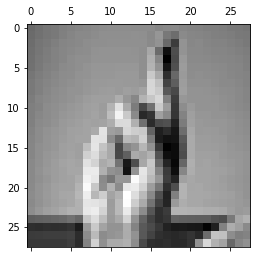

In [10]:
# podejżymy sobie któryś
n = 1234
plt.matshow(x_train[n])
plt.gray()
print("Label: ", np.argmax(y_train[n]))

### Dodanie jednego dodatkowego wymiaru do x_train i x_test

In [11]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [12]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (27455, 28, 28, 1)
x_test shape:  (7172, 28, 28, 1)


### Zapisanie x_train, x_test, y_train, y_test do plików

In [13]:
np.save('x_train.npy', x_train)
np.save('x_test.npy', x_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

### Wczytanie z pliku

In [14]:
loaded_x_train = np.load('x_train.npy')
loaded_x_test = np.load('x_test.npy')
loaded_y_train = np.load('y_train.npy')
loaded_y_test = np.load('y_test.npy')